<a href="https://colab.research.google.com/github/KOHAKUDEUS/Healthcare-Machine-Learning/blob/main/Prediction_of_Wine_type_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
file_path_01 = ('/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/winequality-white.csv')
file_path_02 = ('/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/winequality-red.csv')

df_white = pd.read_csv(file_path_01, delimiter = ';', header = 0 )

df_red = pd.read_csv(file_path_02, delimiter = ';', header = 0)



In [31]:
print(df_white.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [32]:
print(df_white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [33]:
print(df_red.tail())
print(df_white.describe())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  


In [34]:
print(f'df_white: {df_white.shape}')
print(f'df_red: {df_red.shape}')

df_white: (4898, 12)
df_red: (1599, 12)


In [35]:
duplicate_w = df_white.duplicated()
duplicate_r = df_red.duplicated()
duplicate_wdf = duplicate_w[duplicate_w]

print(df_white[df_white.duplicated()])
print(duplicate_wdf.sum())

duplicate_r = df_red.duplicated()
duplicate_rdf = duplicate_r.duplicated()
print(duplicate_rdf.sum())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  

In [36]:
missing_w = df_white.isnull()

missing_r = df_red.isnull()
print(missing_r.sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


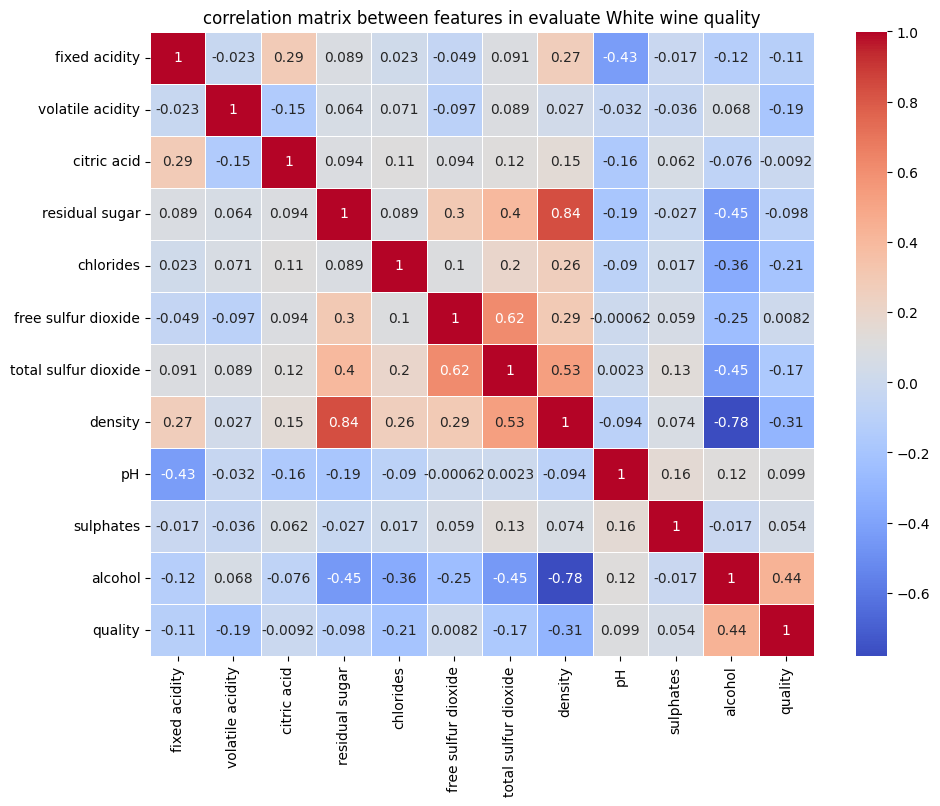

In [37]:
# importance feature
correlation_matrix_w = df_white.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_w, annot = True, cmap = 'coolwarm', linewidth = '0.5')
plt.tight_layout()
plt.title("correlation matrix between features in evaluate White wine quality")
plt.show()
correlation_matrix_r = df_red.corr()

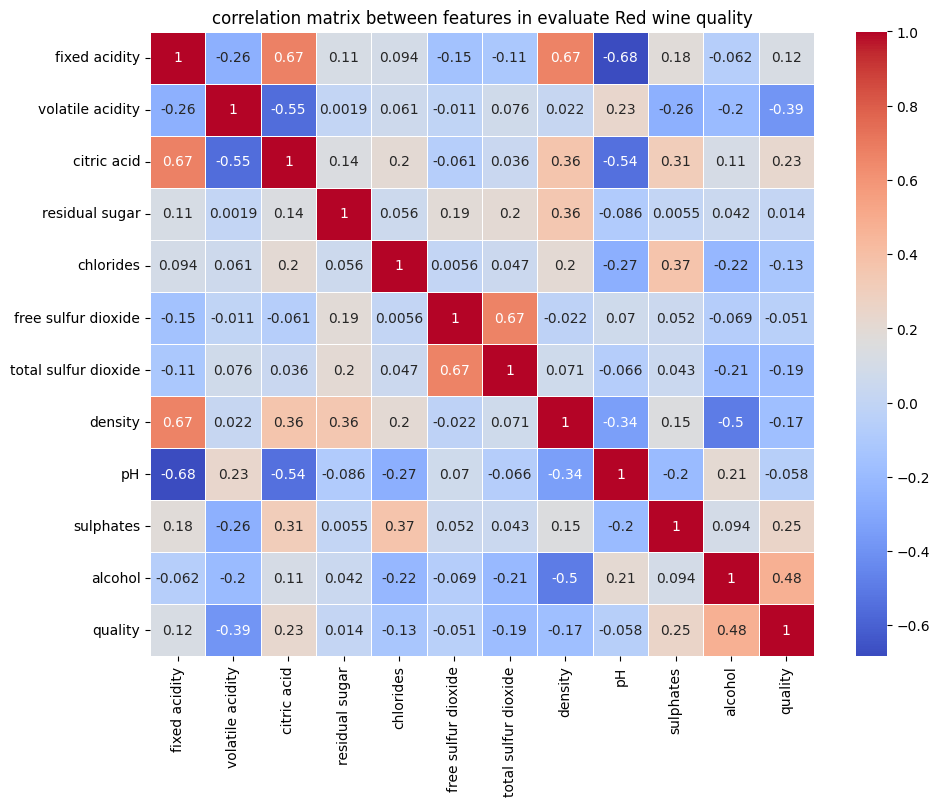

In [38]:
correlation_matrix_r = df_red.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(data = correlation_matrix_r, annot = True, cmap = 'coolwarm', linewidths = '0.5')
plt.tight_layout()
plt.title('correlation matrix between features in evaluate Red wine quality')
plt.show()

In [39]:
print(correlation_matrix_r)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.37
corr_feature_r = correlation_matrix_r[(correlation_matrix_r >= threshold) & (correlation_matrix_r <  1)]
corr_pair = corr_feature_r.stack().reset_index()
corr_pair.columns = ['Feature1', 'Feature2', 'Correlation']
#print(corr_pair)
for index, row in corr_pair.iterrows():
  Feature1 = row['Feature1']
  Feature2 = row['Feature2']
  #plt.figure(figsize = (6, 4))
  #sns.scatterplot(x = df_red[Feature1], y = df_red[Feature2])
  #print(f'Scatter plot between {Feature1} and {Feature2} (Correlation = {row["Correlation"]:.2f})')
  #plt.tight_layout()
  #plt.plot()


Scatter plot between fixed acidity and fixed acidity (Correlation = 1.00)


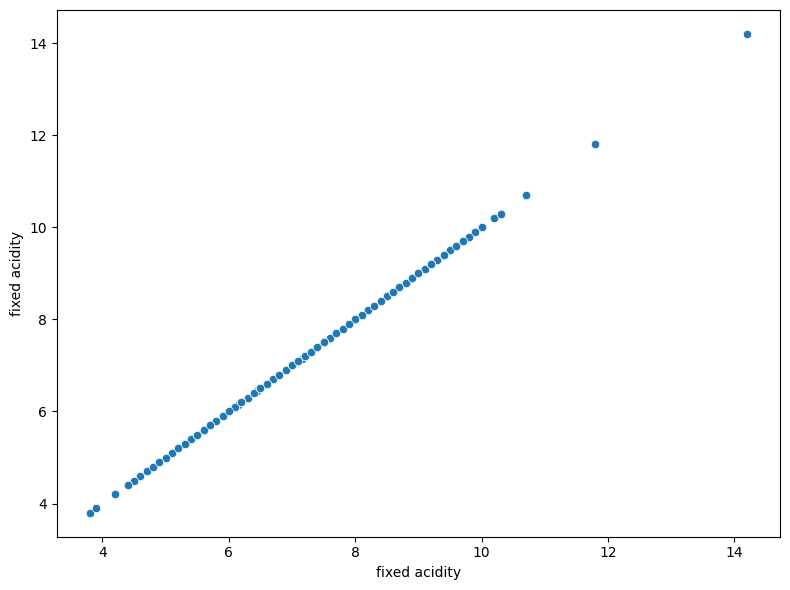

Scatter plot between fixed acidity and citric acid (Correlation = 0.29)


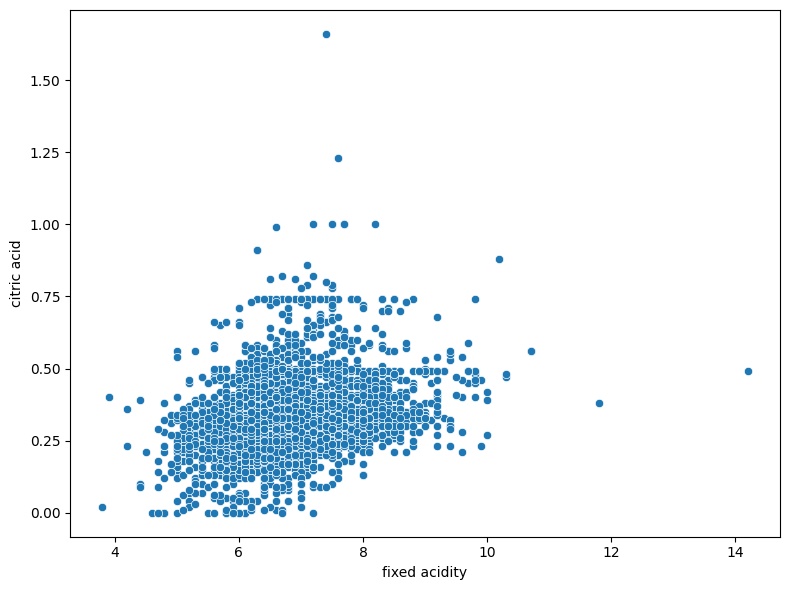

Scatter plot between fixed acidity and density (Correlation = 0.27)


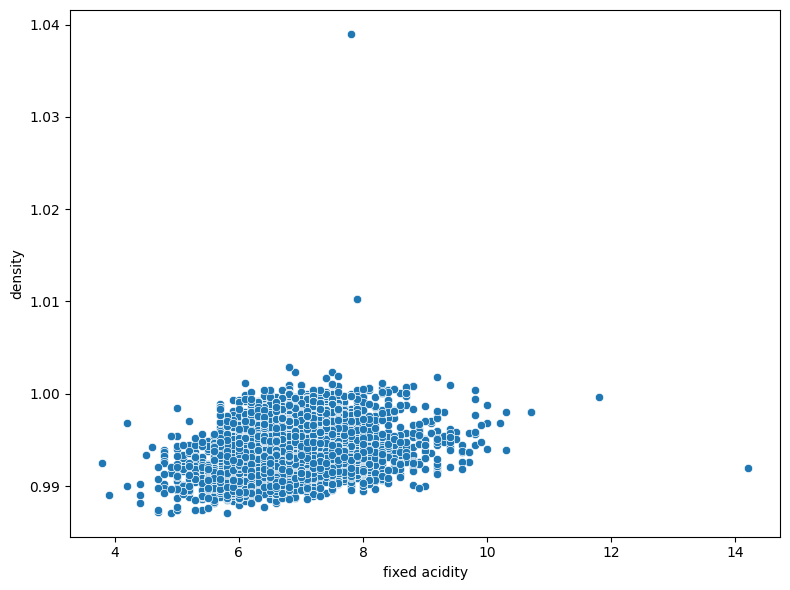

Scatter plot between volatile acidity and volatile acidity (Correlation = 1.00)


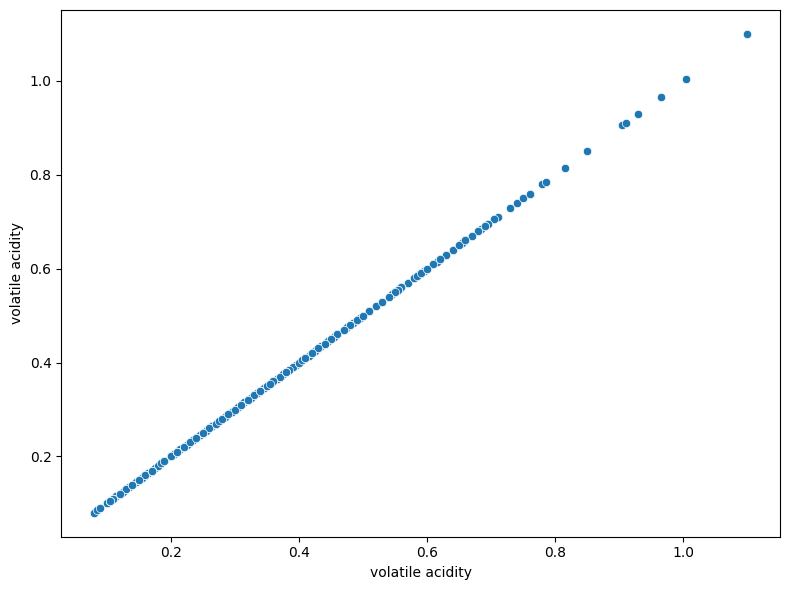

Scatter plot between citric acid and fixed acidity (Correlation = 0.29)


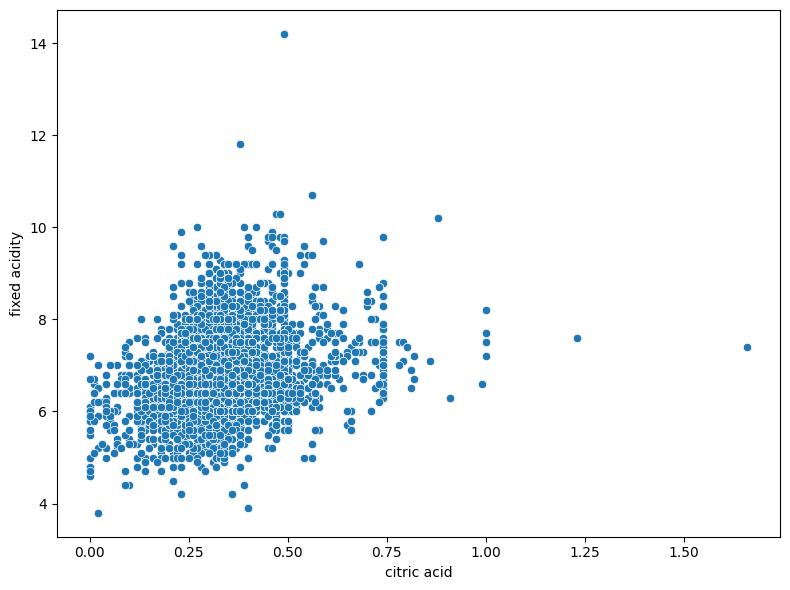

Scatter plot between citric acid and citric acid (Correlation = 1.00)


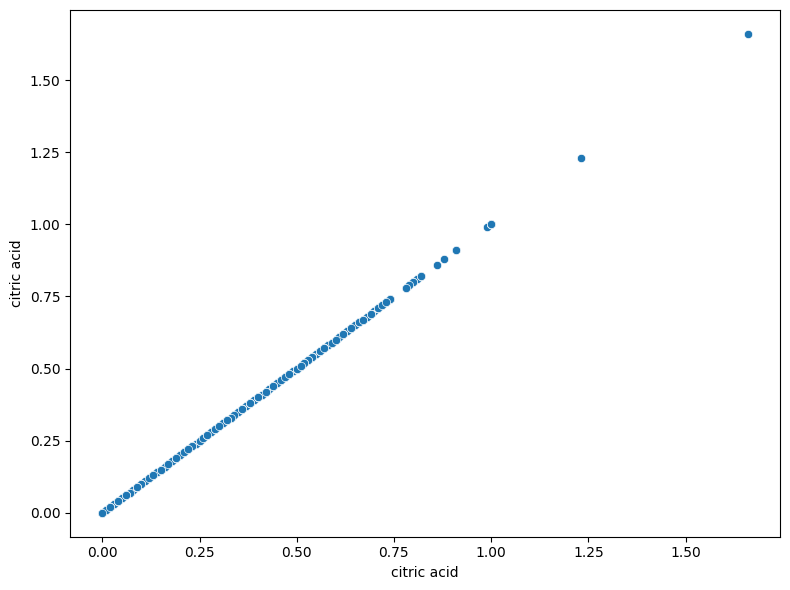

Scatter plot between residual sugar and residual sugar (Correlation = 1.00)


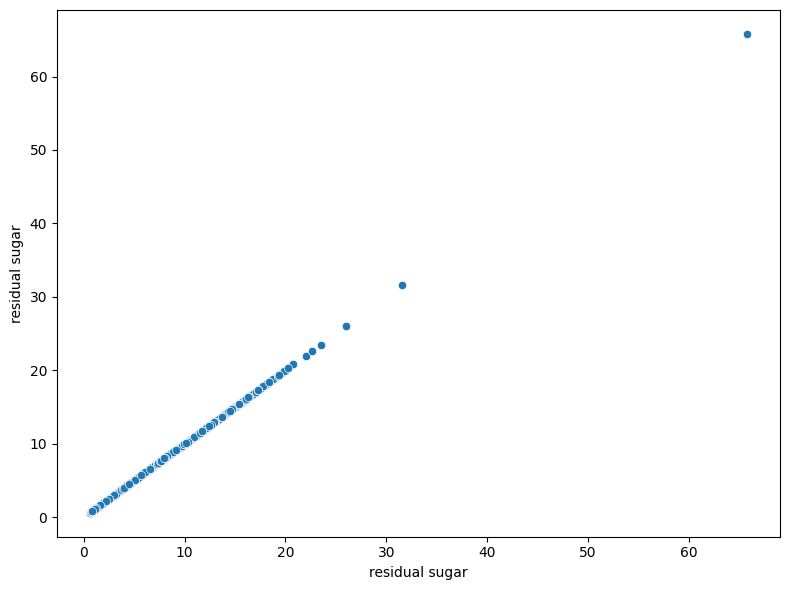

Scatter plot between chlorides and chlorides (Correlation = 1.00)


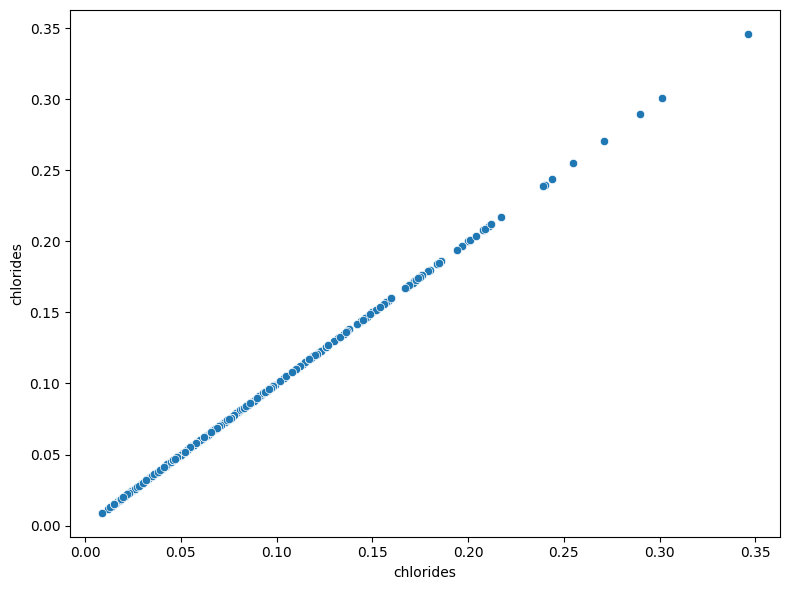

Scatter plot between chlorides and sulphates (Correlation = 0.02)


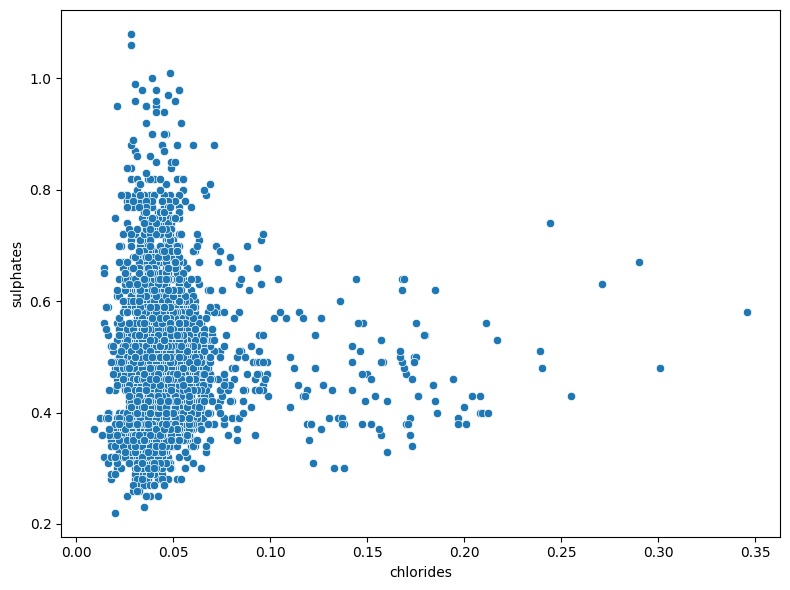

Scatter plot between free sulfur dioxide and free sulfur dioxide (Correlation = 1.00)


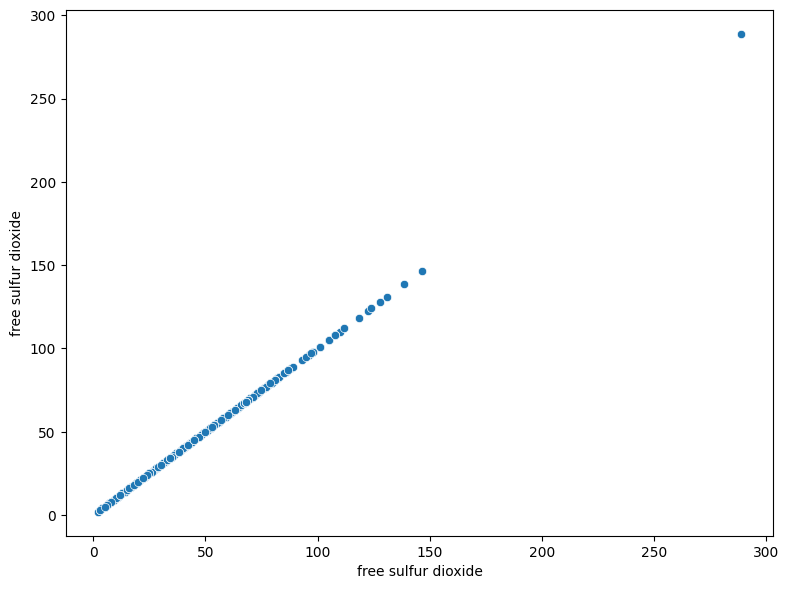

Scatter plot between free sulfur dioxide and total sulfur dioxide (Correlation = 0.62)


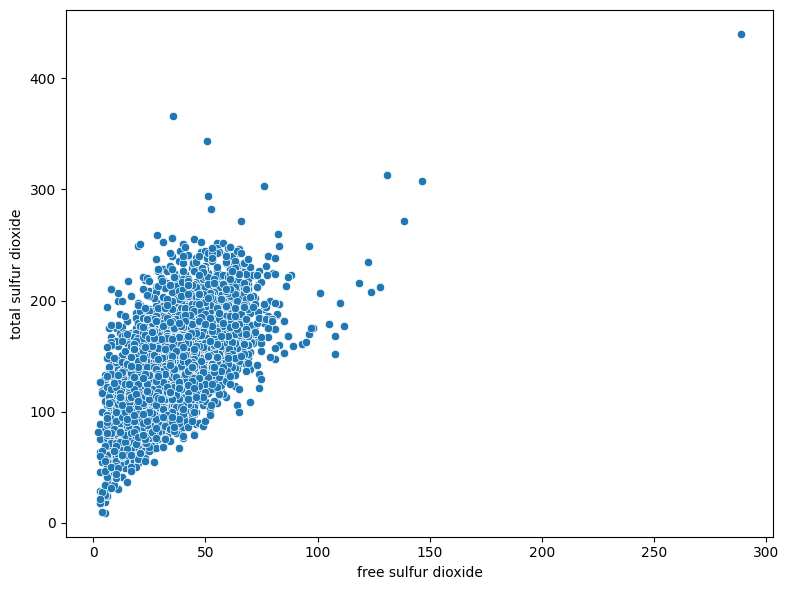

Scatter plot between total sulfur dioxide and free sulfur dioxide (Correlation = 0.62)


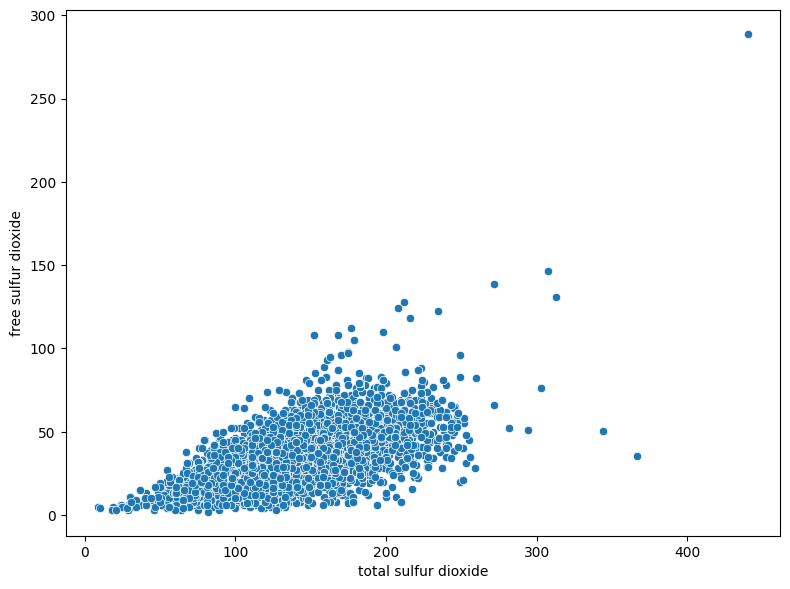

Scatter plot between total sulfur dioxide and total sulfur dioxide (Correlation = 1.00)


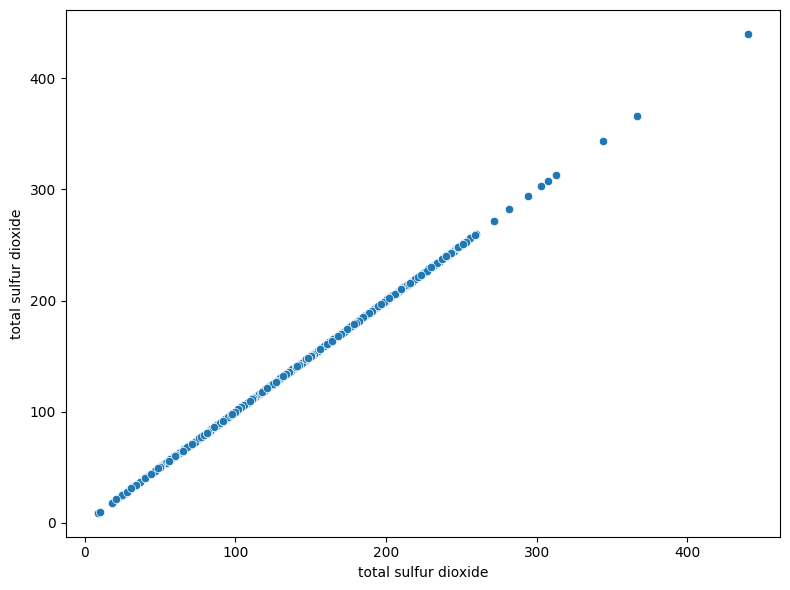

Scatter plot between density and fixed acidity (Correlation = 0.27)


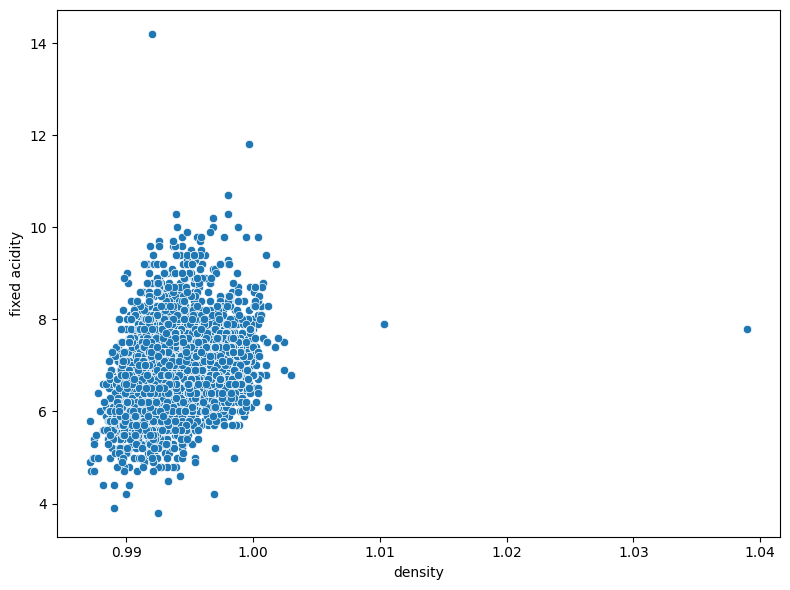

Scatter plot between density and density (Correlation = 1.00)


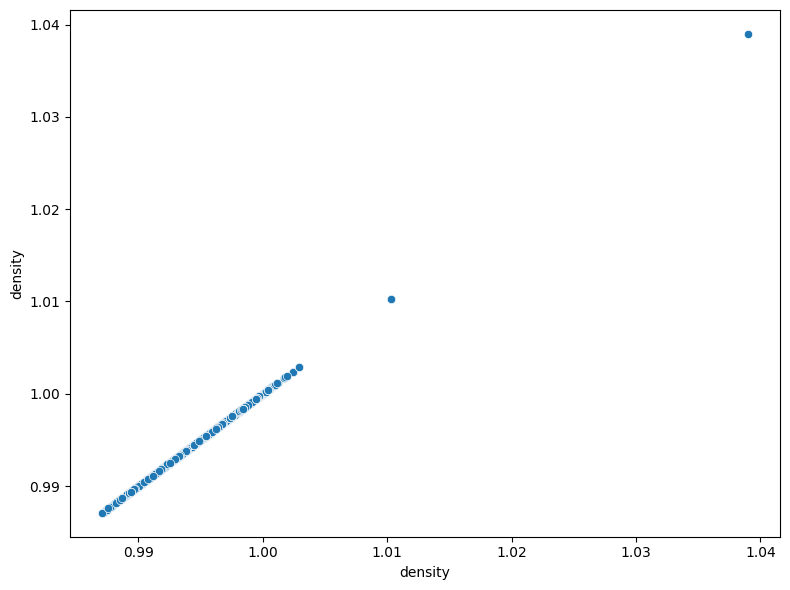

Scatter plot between pH and pH (Correlation = 1.00)


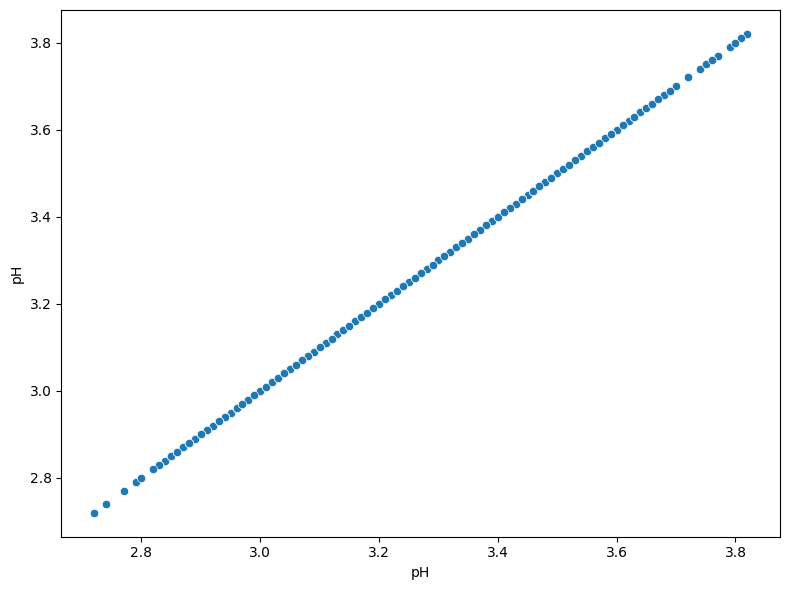

Scatter plot between sulphates and chlorides (Correlation = 0.02)


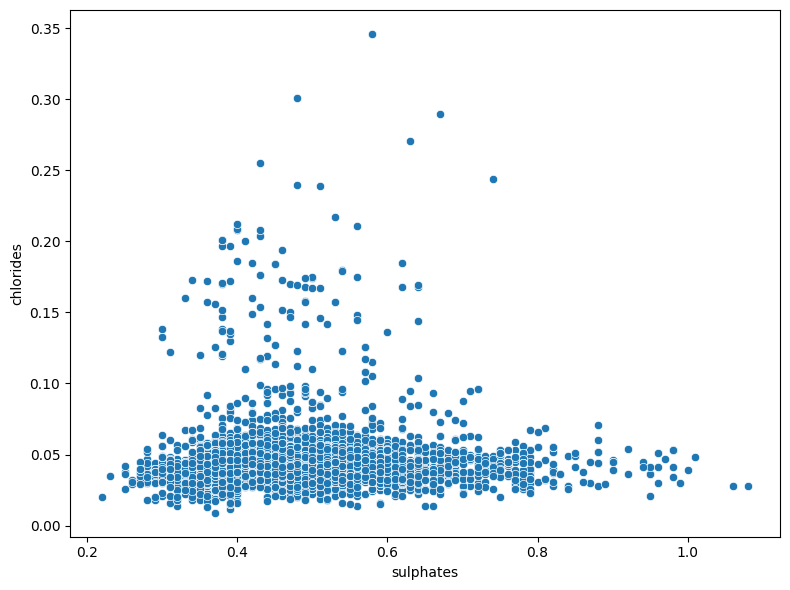

Scatter plot between sulphates and sulphates (Correlation = 1.00)


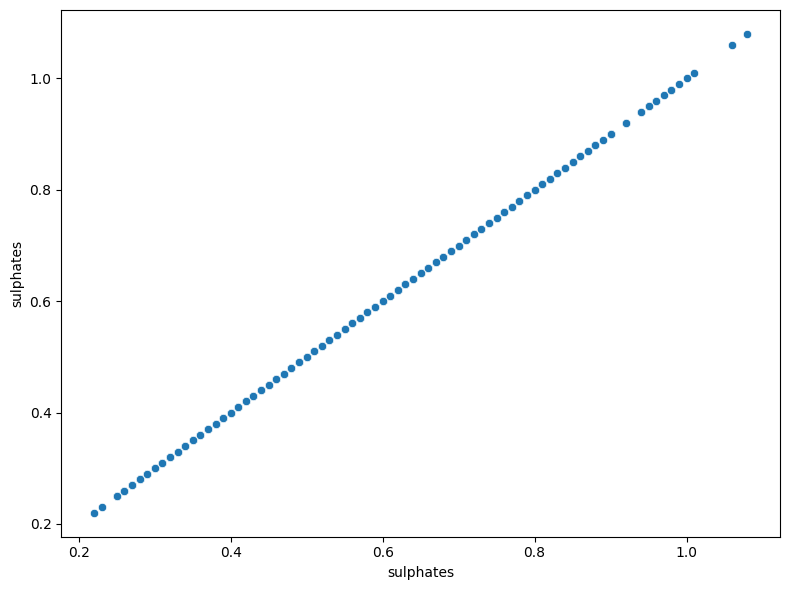

Scatter plot between alcohol and alcohol (Correlation = 1.00)


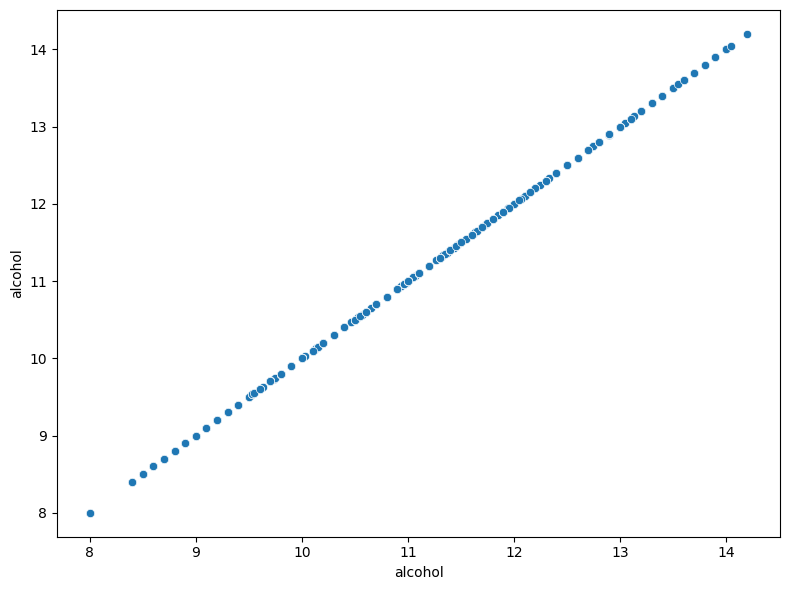

Scatter plot between alcohol and quality (Correlation = 0.44)


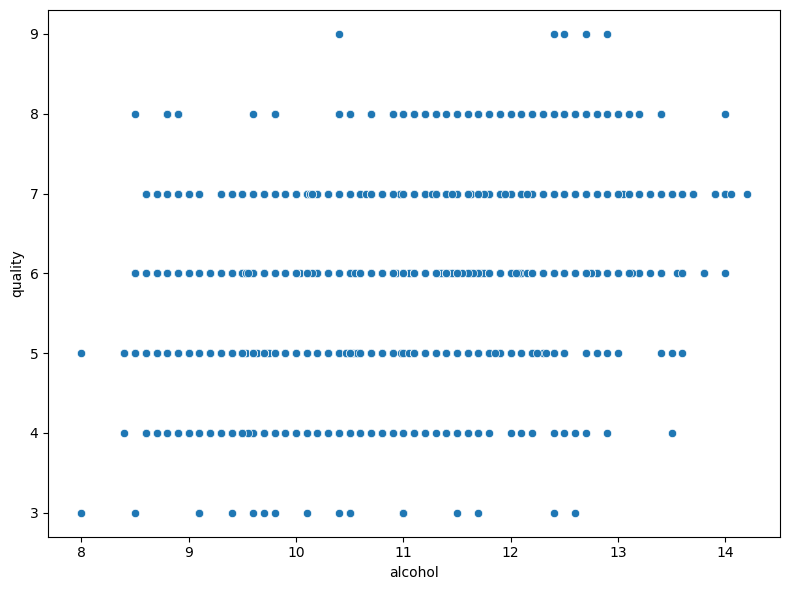

Scatter plot between quality and alcohol (Correlation = 0.44)


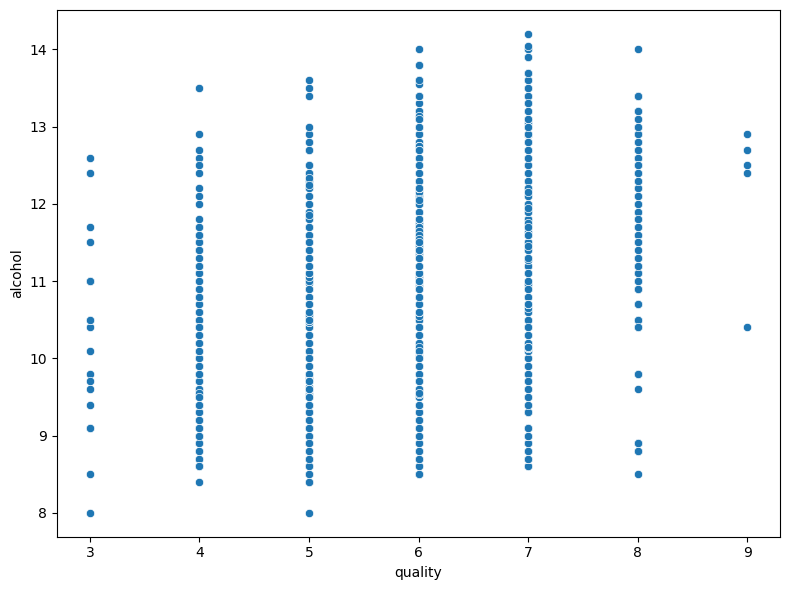

Scatter plot between quality and quality (Correlation = 1.00)


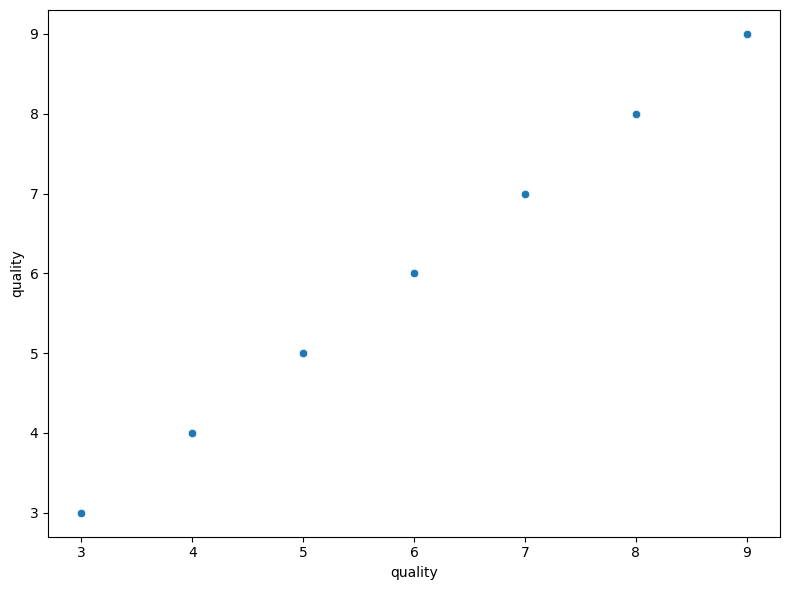

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

threshold = 0.37
corr_feature_w = correlation_matrix_w[correlation_matrix_r >= threshold]
corr_pair = corr_feature_w.stack().reset_index()
corr_pair.columns = ['Feature1', 'Feature2', 'Correlation']
for index, row in corr_pair.iterrows():
  Feature1 = row['Feature1']
  Feature2 = row['Feature2']
  plt.figure(figsize = (8, 6))
  sns.scatterplot(x = df_white[Feature1], y = df_white[Feature2])
  print(f'Scatter plot between {Feature1} and {Feature2} (Correlation = {row["Correlation"]:.2f})')
  plt.tight_layout()
  plt.show()

In [45]:
import pandas as pd
#add type columns
df_white['type'] = 1
df_red['type'] = 0
merge_df = pd.concat([df_white, df_red], ignore_index = True)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [62]:
# split data
from sklearn.model_selection import train_test_split
X = merge_df.iloc[:,1 : -1 ]
y = merge_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [63]:
y.shape
X.shape

(6497, 11)

In [43]:
#check dubple
#check missing data
#check outliner
#impoetance feature
#correlation feature
#selected feature
#split feature
#fitting feature
#evaluate feature


In [64]:
#Import necessary library
from keras.models import Sequential
#Creating model Sequential, null object and we must add layer's model in it
model = Sequential()
from keras.layers import Dense
model.add(Dense(12, activation = 'relu', input_shape = (11, )))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.get_config
model.get_weights()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
from re import VERBOSE
#training model
model.fit(X_train, y_train, epochs = 3, batch_size = 23, verbose = 1)
threshold = 0.5
y_pred = (model.predict(X_test) >= threshold).astype(int)


Epoch 1/3
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9173 - loss: 0.2259
Epoch 2/3
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2176
Epoch 3/3
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9248 - loss: 0.2097
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [68]:
print(y_pred)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [70]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.1746
Loss: 0.19837801158428192, Accuracy: 0.9276922941207886
